##### DR History Analysis

This script looks at 2024 networks and DR event logs from 2011 through 2023. The goal is to inform maximum DR participation estimates. I am primarily concerned with the frequency and type of DLRP events by network in order to understand if there are any generalizable characteristics of networks with immediate or contingent DLRP events.

## Notes
* Network tiers shift slightly year to year, so it can't be relied on for an analysis
* Some years have different asterisk meanings. See this document for details https://www.coned.com/-/media/files/coned/documents/save-energy-money/rebates-incentives-tax-credits/smart-usage-rewards/demand-response-events.pdf?la=en
* Brownsville Networks = Crown Heights, Richmond Hill, Ridgewood

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # for visualization
from datetime import datetime

# 2024 Networks

In [2]:
# read in hardware data to dataframe
networks_df = pd.read_csv('data/conEdNetworks2024.csv')

networks_df.head()

,borough,network,start time,end time,tier
0,bronx,central bronx,16:00,20:00,2
1,bronx,fordham,16:00,20:00,2
2,bronx,northeast bronx,16:00,20:00,2
3,bronx,riverdale,16:00,20:00,2
4,bronx,southeast bronx,16:00,20:00,2


In [3]:
networks_df.shape

(83, 5)

In [4]:
allN = list(networks_df['network'])
allN

['central bronx',
 'fordham',
 'northeast bronx',
 'riverdale',
 'southeast bronx',
 'west bronx',
 'bay ridge',
 'borough hall',
 'brighton beach',
 'crown heights',
 'flatbush',
 'ocean parkway',
 'park slope',
 'prospect park',
 'ridgewood',
 'sheepshead bay',
 'williamsburg',
 'battery park city',
 'beekman',
 'bowling green',
 'canal',
 'central park',
 'chelsea',
 'city hall',
 'columbus circle',
 'cooper square',
 'cortlandt',
 'empire',
 'fashion',
 'freedom',
 'fulton',
 'grand central',
 'greeley square',
 'greenwich',
 'harlem',
 'herald square',
 'hudson',
 'hunter',
 'kips bay',
 'lenox hill',
 'lincoln square',
 'madison square',
 'midtown west',
 'park place',
 'pennsylvania',
 'plaza',
 'randalls island',
 'rockefeller center',
 'roosevelt',
 'sheridan square',
 'sutton',
 'times square',
 'triboro',
 'turtle bay',
 'washington heights',
 'yorkville',
 'borden',
 'flushing',
 'jackson heights',
 'jamaica',
 'long island city',
 'maspeth',
 'rego park',
 'richmond hill',

In [5]:
# list(networks_df[networks_df['network']=='fordham']['borough'])[0]

In [6]:
#get list of non-manhattan networks
nM = list(networks_df[networks_df['borough']!= 'manhattan']['network'])
print(nM)

#get list of manhattan networks
mN =  list(networks_df[networks_df['borough']== 'manhattan']['network'])

['central bronx', 'fordham', 'northeast bronx', 'riverdale', 'southeast bronx', 'west bronx', 'bay ridge', 'borough hall', 'brighton beach', 'crown heights', 'flatbush', 'ocean parkway', 'park slope', 'prospect park', 'ridgewood', 'sheepshead bay', 'williamsburg', 'borden', 'flushing', 'jackson heights', 'jamaica', 'long island city', 'maspeth', 'rego park', 'richmond hill', 'sunnyside', 'fox hills', 'fresh kills', 'wainwright', 'willowbrook', 'woodrow', 'buchanan', 'cedar street', 'elmsford 2', 'granite hill', 'grasslands', 'harrison', 'millwood west', 'mohansic', 'washington street', 'white plains', 'pleasantville', 'rockview', 'ossining west']


In [7]:
#get representative networks
#repNet = {}
for t in range(2):
    tN = networks_df.loc[networks_df['tier']== t+1]
    for ti in ['11:00','14:00','16:00','19:00']:
        tNT = tN.loc[tN['start time']==ti]
        
        for b in range(2):
            if b == 0:
                bL = ['bronx', 'brooklyn', 'manhattan', 'queens']
            else:
                bL = ['staten island','westchester']
                     
            tNTB = tNT.loc[tNT['borough'].isin(bL)]
            print('B' + str(b+1) +'_T'+str(t+1) + '_S'+ str(ti) + ': ' + str(tNTB.shape[0]))

B1_T1_S11:00: 15
B2_T1_S11:00: 0
B1_T1_S14:00: 27
B2_T1_S14:00: 5
B1_T1_S16:00: 10
B2_T1_S16:00: 13
B1_T1_S19:00: 3
B2_T1_S19:00: 0
B1_T2_S11:00: 0
B2_T2_S11:00: 0
B1_T2_S14:00: 1
B2_T2_S14:00: 0
B1_T2_S16:00: 8
B2_T2_S16:00: 0
B1_T2_S19:00: 1
B2_T2_S19:00: 0


In [8]:
#percentage of tier 2 networks
networks_df[networks_df['tier']==2].shape[0]/int(networks_df.shape[0])

0.12048192771084337

# DR Event Logs

In [2]:
# read in logs to dataframe

log_df = pd.read_csv('data/DR-activitylog-cleaned.csv')

#convert event dates to datetime format
log_df['Event Date'] = pd.to_datetime(log_df['Event Date'])

print(log_df.shape)
log_df.head()

(865, 9)


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
0,2011-06-08,Con Edison,DLC,15:00,16:00,1:00,All,Test,NaN
1,2011-06-08,Con Edison,DLRP,15:00,16:00,1:00,All,Test,NaN
2,2011-06-08,Con Edison,RSAP,16:00,17:00,1:00,Zone J,Test,NaN
3,2011-06-09,Con Edison,CSRP,14:00,15:00,1:00,All,Test,NaN
4,2011-06-09,Con Edison,CSRP,17:00,18:00,1:00,All,Test,NaN


In [3]:
# filter out all NYISO
flog_df = log_df[log_df['Administrator']=='Con Edison']
print(flog_df.shape)

#filter out tests
flog_df = flog_df[log_df['Event/Test']!='Test']
print(flog_df.shape)
flog_df.head()

(779, 9)
(696, 9)


C:\Users\alexn\AppData\Local\Temp\ipykernel_13040\294374127.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flog_df = flog_df[log_df['Event/Test']!='Test']


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
7,2011-07-21,Con Edison,DLC,13:00,18:00,5:00,All,Event,NaN
8,2011-07-21,Con Edison,RSAP,11:00,19:00,8:00,Zone J,Event,NaN
9,2011-07-21,Con Edison,CSRP-Day,12:00,17:00,5:00,All,Event,NaN
10,2011-07-21,Con Edison,CSRP-Night,17:00,22:00,5:00,All,Event,NaN
13,2011-07-22,Con Edison,DLC,7:00,15:00,8:00,Elmsford,Event,NaN


## DLRP analysis

In [4]:
#filter out non DLRP events
dlog_df = flog_df[flog_df['Program'].isin(['DLRP'])]

print(dlog_df.shape)
dlog_df.head()

(157, 9)


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
25,2011-07-22,Con Edison,DLRP,7:00,15:00,8:00,Elmsford,Event,NaN
26,2011-07-22,Con Edison,DLRP,7:00,15:00,8:00,Maspeth,Event,NaN
27,2011-07-22,Con Edison,DLRP,18:00,23:00,5:00,Richmond Hill,Event,NaN
28,2011-07-22,Con Edison,DLRP,18:00,23:00,5:00,Fox Hills,Event,NaN
29,2011-07-22,Con Edison,DLRP,18:00,23:00,5:00,Sheepshead Bay,Event,NaN


In [5]:
#filter out NaN event types
dlog_df = dlog_df[flog_df['Event Type'].notnull()]

print(dlog_df.shape)
dlog_df.head()

(121, 9)


C:\Users\alexn\AppData\Local\Temp\ipykernel_13040\2038490168.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dlog_df = dlog_df[flog_df['Event Type'].notnull()]


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate
176,2016-07-24,Con Edison,DLRP,6:00,10:00,4:00,Riverdale,Event,Contingency
195,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Crown Heights,Event,Contingency


In [13]:
#args: list of networks
brownsvilleNetworks = ['crown heights', 'richmond hill', 'ridgewood']

def getUnique(l):
    nL = []
    #loop through list
    for n in l:
        n = n.lower()
        #replace Brownsville group with actual network names
        if n == 'brownsville*':
            for b in brownsvilleNetworks :
                if b not in nL:
                    nL.append(b)
        elif n == 'all^':
            #in 2019 All^ exlcludes Manhattan, Borough Hall, and Brownsville
            #in 2020 All^ excludes Brownsville Networks but this is not present in the filtered data
            #loop through all networks
            for nn in allN:
                #exclude browseville networks
                if nn not in brownsvilleNetworks:
                    #exclude manhattan networks
                    if nn not in mN:
                        if nn != 'borough hall':
                            #check if already in list
                            if nn not in nL:
                                nL.append(nn) 
        elif n == 'non-manhattan**':
            #in 2019 Non-Manhattan** excludes Brownsville (BQDM) networks but this is not present in the filtered data
            #in 2020 Non-Manhattan** excludes Borough Hall
            #loop through all non-manhattan networks
            for nn in nM:
                if nn not in nL:
                    if nn != 'borough hall':
                        nL.append(nn)
        elif n == 'non-manhattan***':
            #in 2020 Non-Manhattan*** includes Washington Heights in Manhattan. Excludes Borough Hall
            for nn in nM:
                if nn not in nL:
                    if nn != 'borough hall':
                        nL.append(nn)
            if 'washington heights' not in nL:
                nL.append('washington heights')
        else:
            if n not in nL:
                nL.append(n)
        
    return nL
        

In [14]:
print(dlog_df['Zone/Network'].unique())

#list of networks that have had DLRP events of either type
DLRPuN = getUnique(dlog_df['Zone/Network'].unique())

#print network names
print(DLRPuN)

#print amount of networks
print(len(DLRPuN))

#print percentage of total networks
len(DLRPuN)/networks_df.shape[0]

['Fresh Kills' 'Fox Hills' 'Triboro' 'Riverdale' 'Crown Heights'
 'Ridgewood' 'Richmond Hill' 'Sheepshead Bay' 'Williamsburg'
 'Prospect Park' 'Central Park' 'Madison Square' 'Cooper Square'
 'Brownsville*' 'Willowbrook' 'All^' 'Flatbush' 'Wainwright' 'Bay Ridge'
 'Rego Park' 'Non-Manhattan**' 'Maspeth' 'Southeast Bronx'
 'Non-Manhattan***' 'Borough Hall' 'Yorkville' 'Jamaica' 'City Hall'
 'Ossining West' 'Park Slope' 'Central Bronx' 'Cedar Street'
 'Washington Street' 'Elmsford 2' 'Jackson Heights' 'Borden' 'Sunnyside']
['fresh kills', 'fox hills', 'triboro', 'riverdale', 'crown heights', 'ridgewood', 'richmond hill', 'sheepshead bay', 'williamsburg', 'prospect park', 'central park', 'madison square', 'cooper square', 'willowbrook', 'central bronx', 'fordham', 'northeast bronx', 'southeast bronx', 'west bronx', 'bay ridge', 'brighton beach', 'flatbush', 'ocean parkway', 'park slope', 'borden', 'flushing', 'jackson heights', 'jamaica', 'long island city', 'maspeth', 'rego park', 'sunny

0.6144578313253012

In [15]:
#networks that have never experience DLRP events
nonDLRP = []
for n in allN:
    if n not in DLRPuN:
        nonDLRP.append(n)

print(len(nonDLRP))
display(networks_df[networks_df['network'].isin(nonDLRP)])


32


,borough,network,start time,end time,tier
17,manhattan,battery park city,14:00,18:00,1
18,manhattan,beekman,14:00,18:00,1
19,manhattan,bowling green,11:00,15:00,1
20,manhattan,canal,14:00,18:00,1
22,manhattan,chelsea,14:00,18:00,1
24,manhattan,columbus circle,14:00,18:00,1
26,manhattan,cortlandt,11:00,15:00,1
27,manhattan,empire,14:00,18:00,1
28,manhattan,fashion,14:00,18:00,1
29,manhattan,freedom,11:00,15:00,1


### Analysis of Immediate Events

In [16]:
#immediate events
#filter out NaN event types
elog_df = dlog_df[flog_df['Event Type']=='Immediate']

uniIE = elog_df['Zone/Network'].unique()

print(len(uniIE))
print(len(uniIE)/networks_df.shape[0])
print(uniIE)
elog_df.head()

22
0.26506024096385544
['Fresh Kills' 'Fox Hills' 'Triboro' 'Williamsburg' 'Prospect Park'
 'Willowbrook' 'Flatbush' 'Bay Ridge' 'Southeast Bronx' 'Yorkville'
 'Maspeth' 'Central Park' 'Jamaica' 'Rego Park' 'City Hall'
 'Ossining West' 'Ridgewood' 'Central Bronx' 'Cedar Street'
 'Washington Street' 'Elmsford 2' 'Jackson Heights']


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate


In [17]:
#get representative networks for those that have had DLRP immediate events

nG = []
for iN in uniIE:
    tempN = networks_df[networks_df['network']== iN.lower()]
    if list(tempN['borough'])[0] in ['staten island','westchester']:
        nG.append("T" + str(list(tempN['tier'])[0]) + " B2 " + str(list(tempN['start time'])[0]))
    else:
        nG.append("T" + str(list(tempN['tier'])[0]) + " B1 " + str(list(tempN['start time'])[0]))
        
    
print(list(nG))

nGDict = dict(zip(set(nG),[0] * len(set(nG))))

for n in nG:
    nGDict[n] = nGDict[n] + 1
    
nGDict
# set(nG)
        #repNet = {}
# for t in range(2):
#     tN = networks_df.loc[networks_df['tier']== t+1]
#     for ti in ['11:00','14:00','16:00','19:00']:
#         tNT = tN.loc[tN['start time']==ti]
        
#         for b in range(2):
#             if b == 0:
#                 bL = ['bronx', 'brooklyn', 'manhattan', 'queens']
#             else:
#                 bL = 
                     
#             tNTB = tNT.loc[tNT['borough'].isin(bL)]
#             print('B' + str(b+1) +'_T'+str(t+1) + '_S'+ str(ti) + ': ' + str(tNTB.shape[0]))

['T1 B2 16:00', 'T1 B2 16:00', 'T1 B1 14:00', 'T2 B1 14:00', 'T1 B1 16:00', 'T1 B2 16:00', 'T1 B1 16:00', 'T1 B1 14:00', 'T2 B1 16:00', 'T1 B1 14:00', 'T1 B1 16:00', 'T1 B1 16:00', 'T2 B1 16:00', 'T1 B1 16:00', 'T1 B1 14:00', 'T1 B2 16:00', 'T2 B1 19:00', 'T2 B1 16:00', 'T1 B2 16:00', 'T1 B2 16:00', 'T1 B2 16:00', 'T2 B1 16:00']


{'T1 B1 16:00': 5,
 'T1 B1 14:00': 4,
 'T2 B1 16:00': 4,
 'T2 B1 19:00': 1,
 'T2 B1 14:00': 1,
 'T1 B2 16:00': 7}

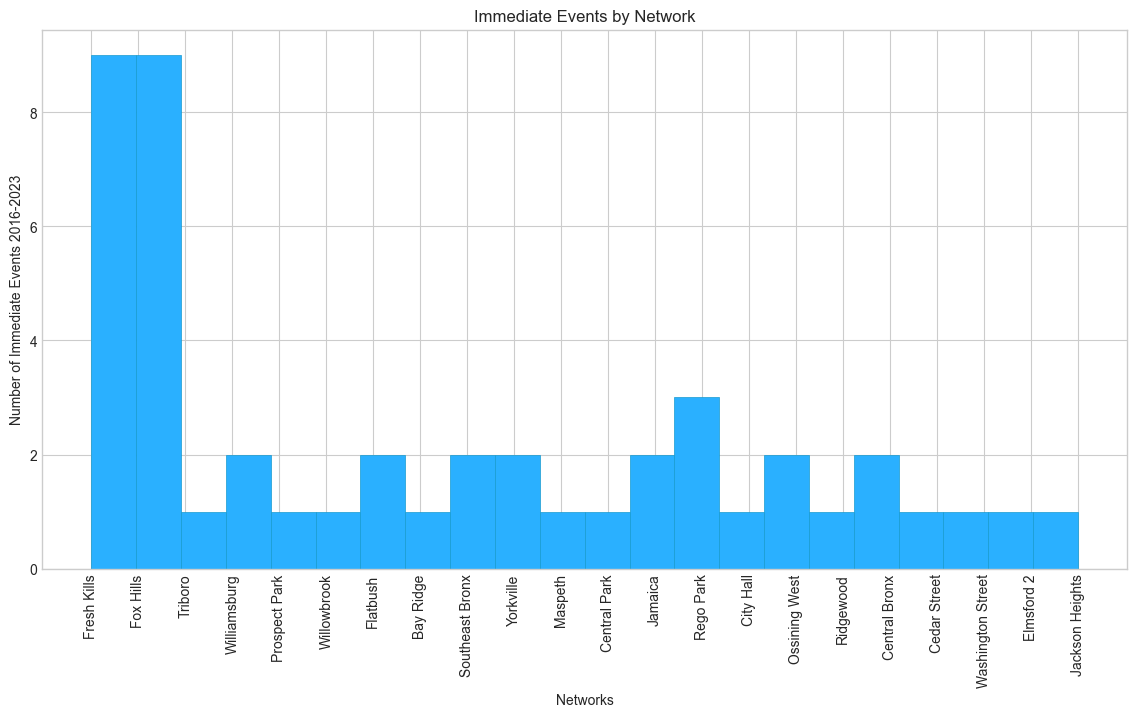

In [18]:
# Histogram of networks with DLRP events

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['Zone/Network'], bins=len(elog_df['Zone/Network'].unique()), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Network') 
plt.xlabel('Networks') 
plt.xticks(rotation='vertical')
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


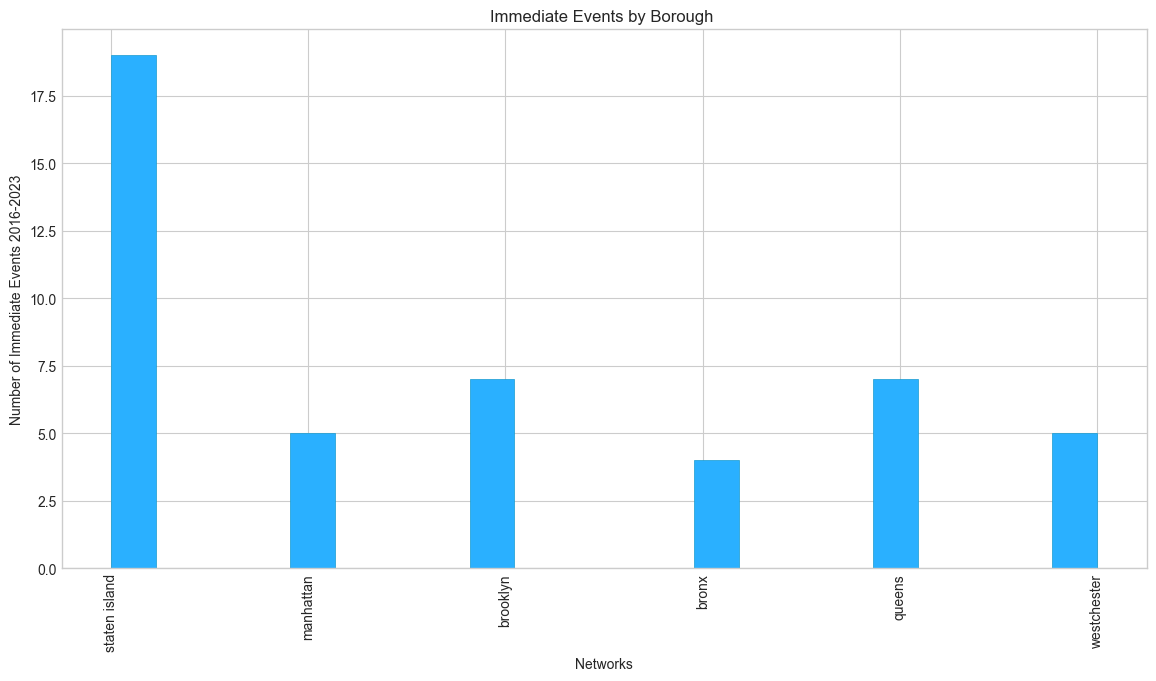

In [19]:
bL = []
for r in range(elog_df.shape[0]):
    mn = elog_df.iloc[r]['Zone/Network'].lower()
    mb = list(networks_df[networks_df['network']==mn]['borough'])[0]    
    bL.append(mb)
             
elog_df['borough'] = bL

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['borough'], bins=len(elog_df['Zone/Network'].unique()), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Borough ') 
plt.xlabel('Networks') 
plt.xticks(rotation='vertical')
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

In [20]:
#investigate staten island events
elog_df[elog_df['borough'] == 'staten island']


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type,borough
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate,staten island
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate,staten island
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate,staten island
231,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fox Hills,Event,Immediate,staten island
232,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fresh Kills,Event,Immediate,staten island
296,2018-05-03,Con Edison,DLRP,16:00,22:00,6:00,Fox Hills,Event,Immediate,staten island
305,2018-06-18,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island
420,2019-07-17,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island
421,2019-07-17,Con Edison,DLRP,17:00,23:00,6:00,Willowbrook,Event,Immediate,staten island


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


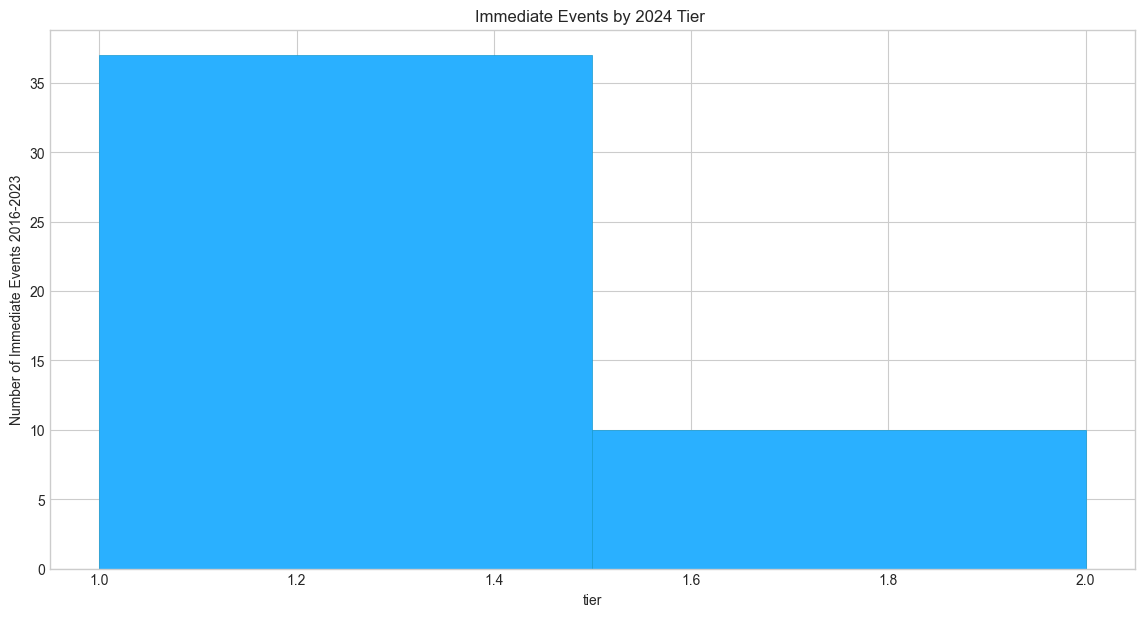

In [21]:
tL = []
for r in range(elog_df.shape[0]):
    mn = elog_df.iloc[r]['Zone/Network'].lower()
    mb = list(networks_df[networks_df['network']==mn]['tier'])[0]    
    tL.append(mb)
             
elog_df['tier'] = tL
#elog_df.head()

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['tier'], bins=2, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by 2024 Tier ') 
plt.xlabel('tier') 
# plt.xticks(rotation='vertical')
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

In [22]:
#convert start times to datetime format
elog_df['DT Format'] = pd.to_datetime(elog_df['Start Time'], format='%H:%M')
elog_df['Start Time Float'] = elog_df['DT Format'].dt.hour + (elog_df['DT Format'].dt.minute/60)
#convert to float
elog_df['Start Time Float'].apply(lambda x: float(x))

elog_df.head()

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type,borough,tier,DT Format,Start Time Float
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate,manhattan,1,1900-01-01 22:00:00,22.0
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 16:00:00,16.0


In [23]:
print('total immediate events:')
print(elog_df.shape[0])
print('immediate events after 2pm:')
print(elog_df[elog_df['Start Time Float'] >= 14.0].shape[0])
print(elog_df[elog_df['Start Time Float'] >= 14.0].shape[0]/elog_df.shape[0])
print('immediate events after 10am:')
print(elog_df[elog_df['Start Time Float'] >= 10.0].shape[0])
print(elog_df[elog_df['Start Time Float'] >= 10.0].shape[0]/elog_df.shape[0])


display(elog_df[elog_df['Start Time Float'] >= 14.0])

total immediate events:
47
immediate events after 2pm:
41
0.8723404255319149
immediate events after 10am:
46
0.9787234042553191


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type,borough,tier,DT Format,Start Time Float
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate,manhattan,1,1900-01-01 22:00:00,22.0
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 16:00:00,16.0
231,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0
232,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0
265,2017-06-19,Con Edison,DLRP,16:00,22:00,6:00,Williamsburg,Event,Immediate,brooklyn,2,1900-01-01 16:00:00,16.0
266,2017-06-19,Con Edison,DLRP,16:00,22:00,6:00,Prospect Park,Event,Immediate,brooklyn,1,1900-01-01 16:00:00,16.0
296,2018-05-03,Con Edison,DLRP,16:00,22:00,6:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 16:00:00,16.0


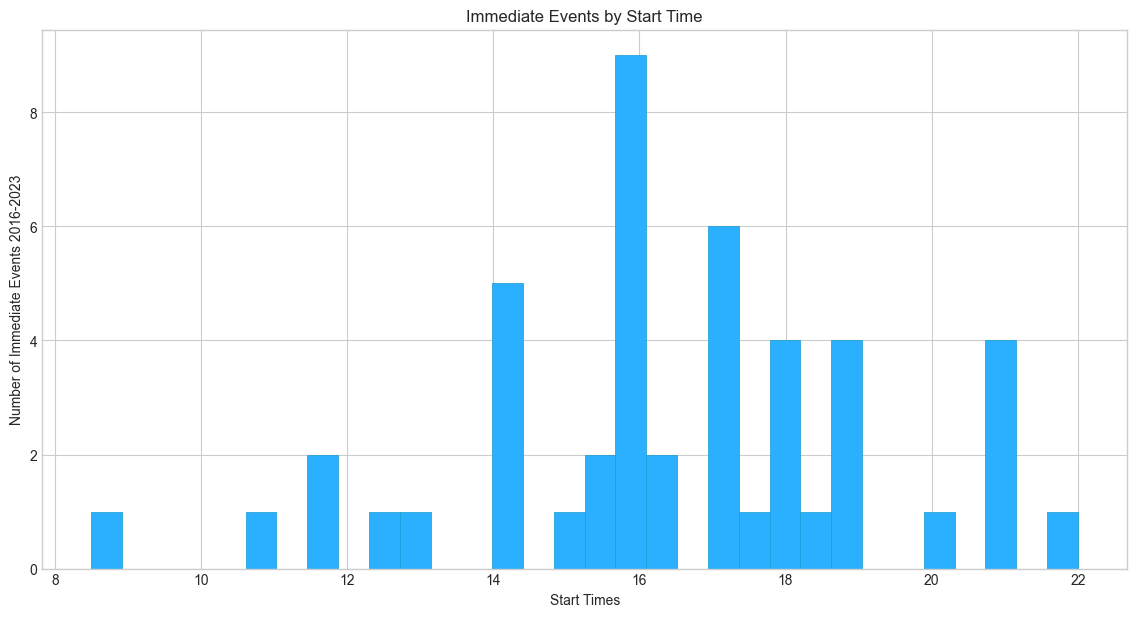

In [24]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['Start Time Float'], bins=32, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Start Time') 
plt.xlabel('Start Times') 
#plt.xticks(elog_df['Start Time Float'])
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


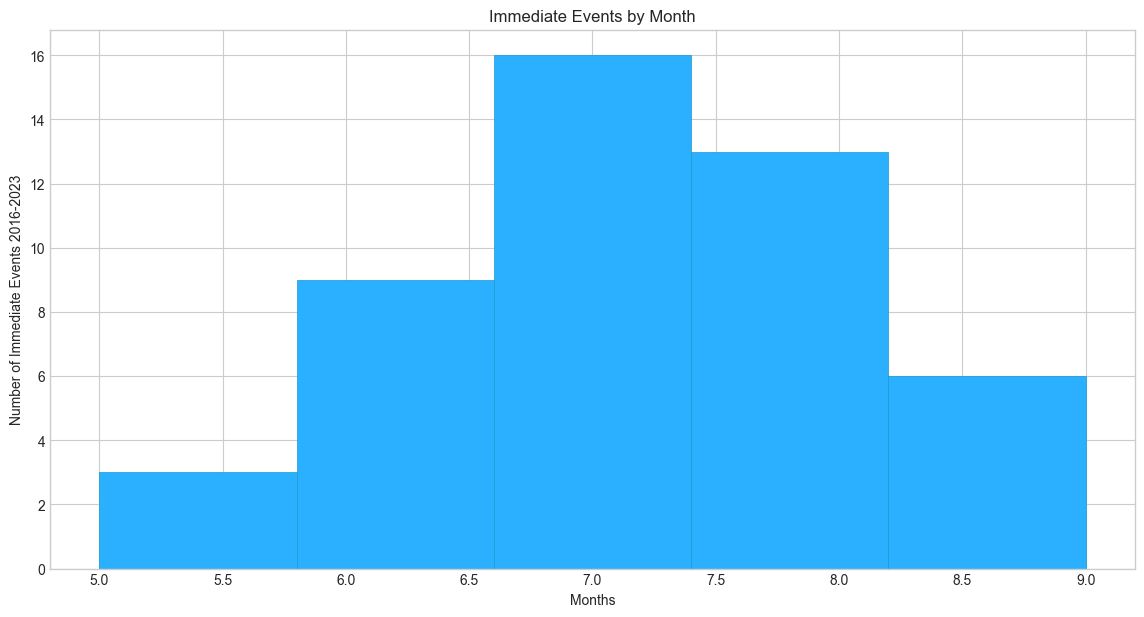

In [25]:
#events by month
elog_df['Month'] = elog_df['Event Date'].dt.month
#elog_df.head()

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['Month'], bins=5, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Month') 
plt.xlabel('Months') 
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

In [26]:
#years in which immediate events occurred

#the average time off from the scheduled time
networks_df['immediate years'] = pd.Series()
#the number of immediate events
networks_df['immediate count'] = 0

iE = {}
for r in range(elog_df.shape[0]):
    n = elog_df.iloc[r]['Zone/Network'].lower()
    #s = float(elog_df.iloc[r]['Start Time Float'])
    #nS = networks_df[networks_df['network']==n]['start time float'].iloc[0]#.loc['start time float']
    #v = abs(s - nS)
    eY = elog_df['Event Date'].iloc[r].year
    networks_df.loc[networks_df['network']==n,'immediate count']= networks_df.loc[networks_df['network']==n,'immediate count'] + 1
    if n in iE.keys():
        iE[n].append(eY)
    else:
        iE[n] = [eY]

for n in iE.keys():
    #get unique years
    u = []
    [u.append(x) for x in iE[n] if x not in u]
    networks_df.loc[networks_df['network']==n,'immediate years']= len(u)

print(iE)
networks_df[networks_df['immediate count'] > 0]


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


{'fresh kills': [2016, 2016, 2016, 2021, 2022, 2022, 2023, 2023, 2023], 'fox hills': [2016, 2016, 2016, 2018, 2018, 2019, 2022, 2023, 2023], 'triboro': [2016], 'williamsburg': [2017, 2021], 'prospect park': [2017], 'willowbrook': [2019], 'flatbush': [2019, 2021], 'bay ridge': [2019], 'southeast bronx': [2020, 2022], 'yorkville': [2021, 2021], 'maspeth': [2021], 'central park': [2021], 'jamaica': [2021, 2022], 'rego park': [2021, 2022, 2023], 'city hall': [2022], 'ossining west': [2022, 2022], 'ridgewood': [2022], 'central bronx': [2022, 2023], 'cedar street': [2022], 'washington street': [2023], 'elmsford 2': [2023], 'jackson heights': [2023]}


,borough,network,start time,end time,tier,immediate years,immediate count
0,bronx,central bronx,16:00,20:00,2,2.0,2
4,bronx,southeast bronx,16:00,20:00,2,2.0,2
6,brooklyn,bay ridge,14:00,18:00,1,1.0,1
10,brooklyn,flatbush,16:00,20:00,1,2.0,2
13,brooklyn,prospect park,16:00,20:00,1,1.0,1
14,brooklyn,ridgewood,19:00,23:00,2,1.0,1
16,brooklyn,williamsburg,14:00,18:00,2,2.0,2
21,manhattan,central park,16:00,20:00,1,1.0,1
23,manhattan,city hall,14:00,18:00,1,1.0,1
52,manhattan,triboro,14:00,18:00,1,1.0,1


In [27]:
iNetworks = networks_df[networks_df['immediate count'] > 0]
print(iNetworks.shape[0])
print(iNetworks['immediate years'].mean())
print('1 year: ' + str(iNetworks[iNetworks['immediate years']==1].shape[0]))
print('2 year: ' + str(iNetworks[iNetworks['immediate years']==2].shape[0]))
print('3 year: ' + str(iNetworks[iNetworks['immediate years']==3].shape[0]))
print('4 year: ' + str(iNetworks[iNetworks['immediate years']==4].shape[0]))
print('5 year: ' + str(iNetworks[iNetworks['immediate years']==5].shape[0]))

22
1.6363636363636365
1 year: 14
2 year: 5
3 year: 1
4 year: 1
5 year: 1


### Analysis of Contingent Events

In [28]:
#contingency events
#filter out non DLRP events
clog_df = flog_df[flog_df['Program'].isin(['DLRP'])]

#filter to only contingency evvnets
clog_df = clog_df[clog_df['Event Type']=='Contingency']
clog_df['Zone/Network'].unique()

array(['Riverdale', 'Crown Heights', 'Ridgewood', 'Richmond Hill',
       'Sheepshead Bay', 'Williamsburg', 'Prospect Park', 'Central Park',
       'Madison Square', 'Cooper Square', 'Brownsville*', 'All^',
       'Flatbush', 'Willowbrook', 'Wainwright', 'Rego Park',
       'Non-Manhattan**', 'Maspeth', 'Non-Manhattan***', 'Borough Hall',
       'Bay Ridge', 'Fresh Kills', 'Park Slope', 'Fox Hills', 'Jamaica'],
      dtype=object)

In [29]:
uC = getUnique(clog_df['Zone/Network'].unique())
print(uC)
print('number of networks with contingency events:')
#number of networks with contingency events
print(len(uC))
#percentage with contingency events
print('percentage with contingency events:')
print(len(uC)/networks_df.shape[0])
#uC


['riverdale', 'crown heights', 'ridgewood', 'richmond hill', 'sheepshead bay', 'williamsburg', 'prospect park', 'central park', 'madison square', 'cooper square', 'central bronx', 'fordham', 'northeast bronx', 'southeast bronx', 'west bronx', 'bay ridge', 'brighton beach', 'flatbush', 'ocean parkway', 'park slope', 'borden', 'flushing', 'jackson heights', 'jamaica', 'long island city', 'maspeth', 'rego park', 'sunnyside', 'fox hills', 'fresh kills', 'wainwright', 'willowbrook', 'woodrow', 'buchanan', 'cedar street', 'elmsford 2', 'granite hill', 'grasslands', 'harrison', 'millwood west', 'mohansic', 'washington street', 'white plains', 'pleasantville', 'rockview', 'ossining west', 'washington heights', 'borough hall']
number of networks with contingency events:
48
percentage with contingency events:
0.5783132530120482


In [30]:
#this was the inform the getUnique function conditions - NOT necessary at this point
#display(clog_df[clog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***','Brownsville*'])])

In [31]:
display(clog_df)

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
176,2016-07-24,Con Edison,DLRP,6:00,10:00,4:00,Riverdale,Event,Contingency
195,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Crown Heights,Event,Contingency
196,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Ridgewood,Event,Contingency
197,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Richmond Hill,Event,Contingency
201,2016-08-12,Con Edison,DLRP,14:00,20:00,6:00,Crown Heights,Event,Contingency
...,...,...,...,...,...,...,...,...,...
675,2021-08-27,Con Edison,DLRP,16:00,22:00,6:00,Cooper Square,Event,Contingency
721,2022-07-24,Con Edison,DLRP,16:00,20:00,4:00,Flatbush,Event,Contingency
727,2022-07-25,Con Edison,DLRP,14:00,18:00,4:00,Park Slope,Event,Contingency
794,2023-07-06,Con Edison,DLRP,10:00,16:00,6:00,Fox Hills,Event,Contingency


In [32]:
def eventCount(d):
    countDict = {}
    yearDict = {}
    
    for n in allN:
        countDict[n] = 0
        yearDict[n] = []
    #print(countDict)
    #print(d['Zone/Network'])
    #for r in d:
    for index, r in d.iterrows():
#     print(row['c1'], row['c2'])
        z = r['Zone/Network']
    
        if z == 'ossining west':
            print('O')
        y = r['Event Date'].year
        #print(z)
        if z not in ['All','All^','Non-Manhattan**','Non-Manhattan***','Brownsville*']:
            countDict[z.lower()]=countDict[z.lower()]+1
            yearDict[z.lower()].append(y)
        elif z == 'All':
            for n in allN:
                countDict[n]=countDict[n]+1
                yearDict[n].append(y)
        elif z == 'Brownsville*':
            for b in brownsvilleNetworks :
                countDict[b]=countDict[b]+1
                yearDict[b].append(y)
        elif z == 'All^':
            #in 2019 All^ exlcludes Manhattan, Borough Hall, and Brownsville
            #in 2020 All^ excludes Brownsville Networks but this is not present in the filtered data
            #loop through all networks
            for nn in allN:
                #exclude browseville networks
                if nn not in brownsvilleNetworks:
                    #exclude manhattan networks
                    if nn not in mN:
                        if nn != 'Borough Hall':
                            countDict[nn.lower()]=countDict[nn.lower()]+1
                            yearDict[nn.lower()].append(y)
        elif z == 'Non-Manhattan**':
            #in 2019 Non-Manhattan** excludes Brownsville (BQDM) networks but this is not present in the filtered data
            #in 2020 Non-Manhattan** excludes Borough Hall
            #loop through all non-manhattan networks
            for nn in nM:
                if nn != 'Borough Hall':
                    countDict[nn.lower()]=countDict[nn.lower()]+1
                    yearDict[nn.lower()].append(y)
        elif z == 'Non-Manhattan***':
            #in 2020 Non-Manhattan*** includes Washington Heights in Manhattan. Excludes Borough Hall
            for nn in nM:
                    if nn != 'Borough Hall':
                        countDict[nn.lower()]=countDict[nn.lower()]+1
                        yearDict[nn.lower()].append(y)
            countDict['washington heights']=countDict['washington heights']+1
            yearDict['washington heights'].append(y)

        countArrayD = []
        
    for n in allN:
        countArrayD.append({'name':n, 'count': countDict[n],'years': yearDict[n]})
    return countArrayD

In [33]:
#network event frequency

#drop duplicates for 'All^' events
prevAllDate=0
dropList = []
for a in range(clog_df.shape[0]):
    if clog_df.iloc[a]['Zone/Network']=='All^':
        if clog_df.iloc[a]['Event Date'] == prevAllDate:
            di =  clog_df.iloc[a]
            dropList.append(clog_df.iloc[a].name)
        else:
            prevAllDate = clog_df.iloc[a]['Event Date']

print(dropList)
clog_df.drop(dropList, inplace=True)
#clog_df[clog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***','Brownsville*'])]

dlrpFreq_df = pd.DataFrame.from_dict(eventCount(clog_df))

#filter out networks without events
dlrpFreq_df = dlrpFreq_df[dlrpFreq_df['count'] > 0]

print(dlrpFreq_df.shape[0])

#get unique year counts
yC = []
for i, r in dlrpFreq_df.iterrows():
    yC.append(len(list(set(r['years']))))
    
dlrpFreq_df['unique years'] = yC

dlrpFreq_df

[441, 442, 443, 463, 464, 465]
48


,name,count,years,unique years
0,central bronx,5,"[2019, 2019, 2020, 2020, 2020]",2
1,fordham,5,"[2019, 2019, 2020, 2020, 2020]",2
2,northeast bronx,5,"[2019, 2019, 2020, 2020, 2020]",2
3,riverdale,6,"[2016, 2019, 2019, 2020, 2020, 2020]",3
4,southeast bronx,5,"[2019, 2019, 2020, 2020, 2020]",2
5,west bronx,5,"[2019, 2019, 2020, 2020, 2020]",2
6,bay ridge,7,"[2019, 2019, 2020, 2020, 2020, 2020, 2021]",3
7,borough hall,6,"[2019, 2019, 2020, 2020, 2020, 2020]",2
8,brighton beach,5,"[2019, 2019, 2020, 2020, 2020]",2
9,crown heights,26,"[2016, 2016, 2016, 2016, 2016, 2016, 2019, 201...",4


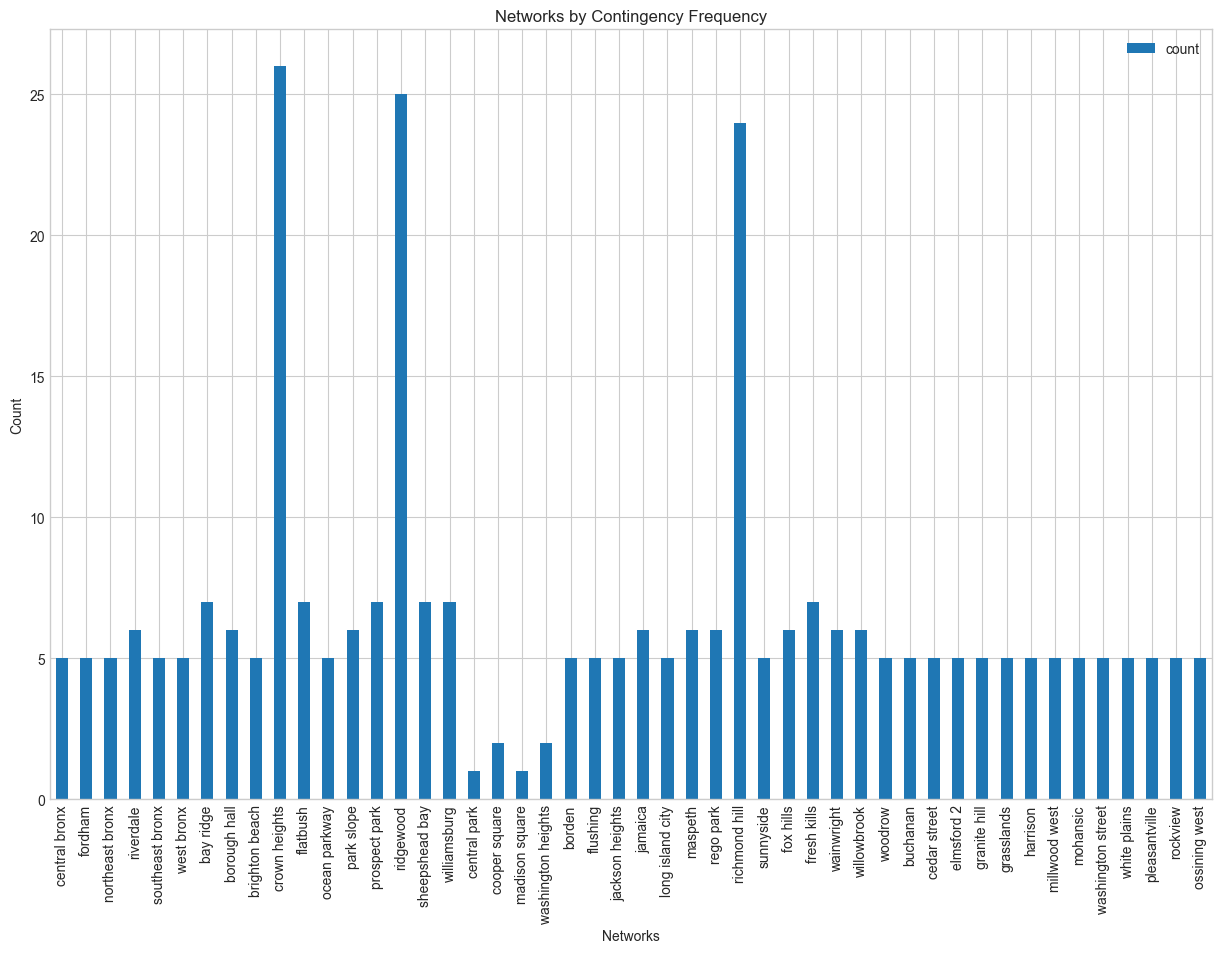

In [34]:
ax = dlrpFreq_df['count'].plot(kind='bar', title ="Networks by Contingency Frequency", figsize=(15, 10), legend=True)
ax.set_xlabel("Networks")
ax.set_xticklabels(list(dlrpFreq_df['name']))
ax.set_ylabel("Count")
plt.show()

amount of networks with 2 or fewer contingency events ever
35
0.42168674698795183


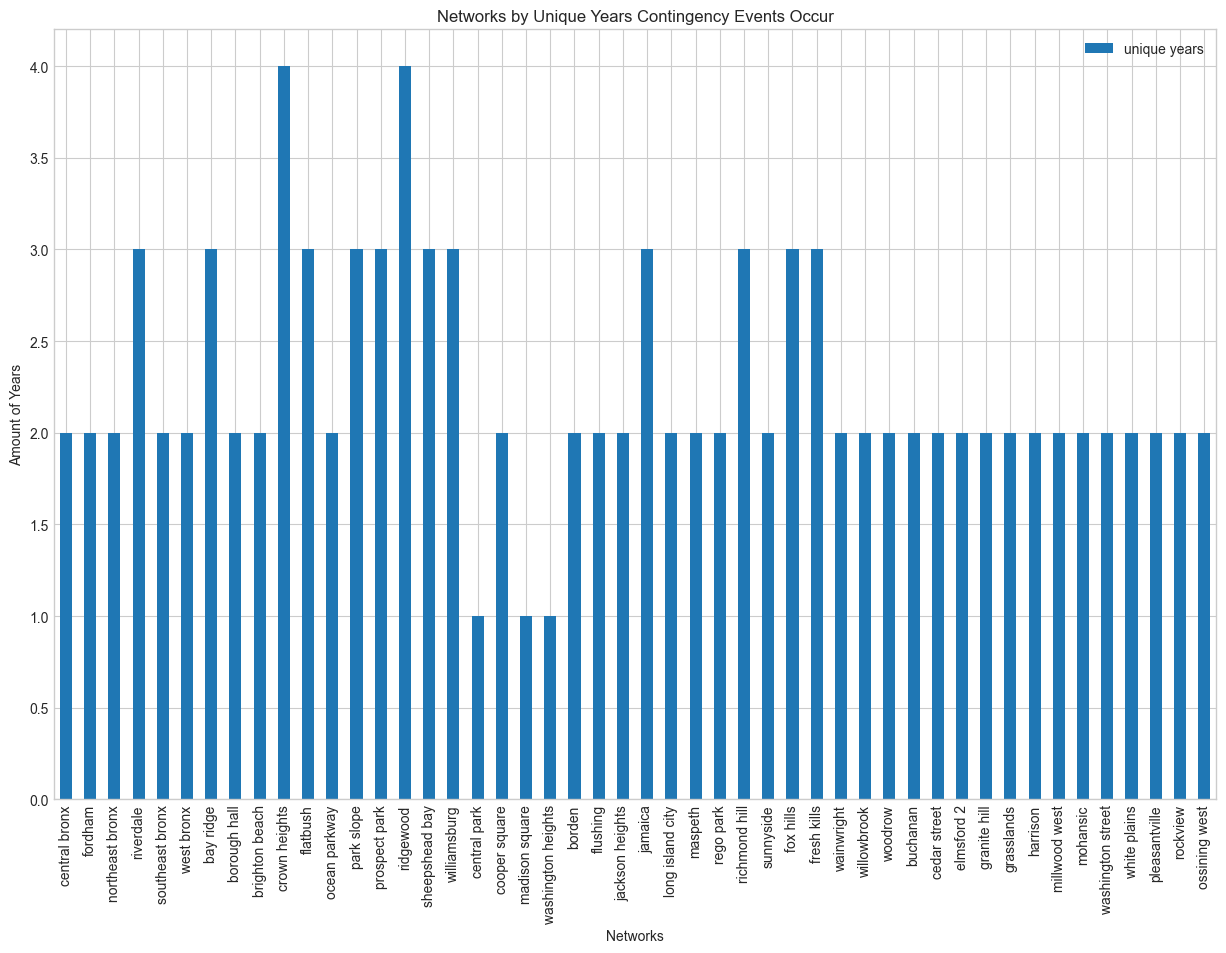

In [35]:
print('amount of networks with 2 or fewer contingency events ever')
print(dlrpFreq_df[dlrpFreq_df['unique years'] <= 2].shape[0])
print(dlrpFreq_df[dlrpFreq_df['unique years'] <= 2].shape[0]/networks_df.shape[0])

ax = dlrpFreq_df['unique years'].plot(kind='bar', title ="Networks by Unique Years Contingency Events Occur", figsize=(15, 10), legend=True)
ax.set_xlabel("Networks")
ax.set_xticklabels(list(dlrpFreq_df['name']))
ax.set_ylabel("Amount of Years")
plt.show()

In [36]:
# # Histogram of networks with DLRP events
# plt.figure(figsize=(14,7)) # Make it 14x7 inch
# plt.style.use('seaborn-whitegrid') # nice and clean grid
# plt.hist(clog_df['Zone/Network'], bins=len(clog_df['Zone/Network'].unique()), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
# plt.title('Contingency Events by Network') 
# plt.xlabel('Networks') 
# plt.xticks(rotation='vertical')
# plt.ylabel('Number of Contingent Events 2016-2023') 
# plt.show()

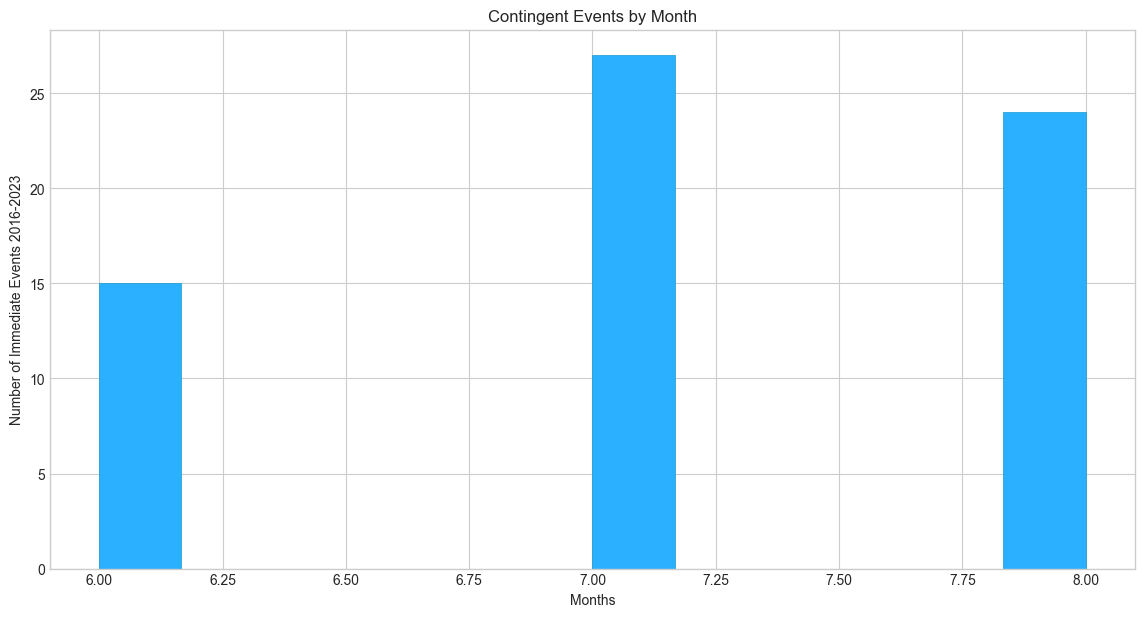

In [37]:
#events by month
clog_df['Month'] = clog_df['Event Date'].dt.month
#elog_df.head()

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(clog_df['Month'], bins=12, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Contingent Events by Month') 
plt.xlabel('Months') 
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

In [38]:
#networks with contingency events NOT in July
set(list(clog_df[clog_df['Month']!=7]['Zone/Network']))
len(list(set(list(clog_df[clog_df['Month']!=7]['Zone/Network']))))

13

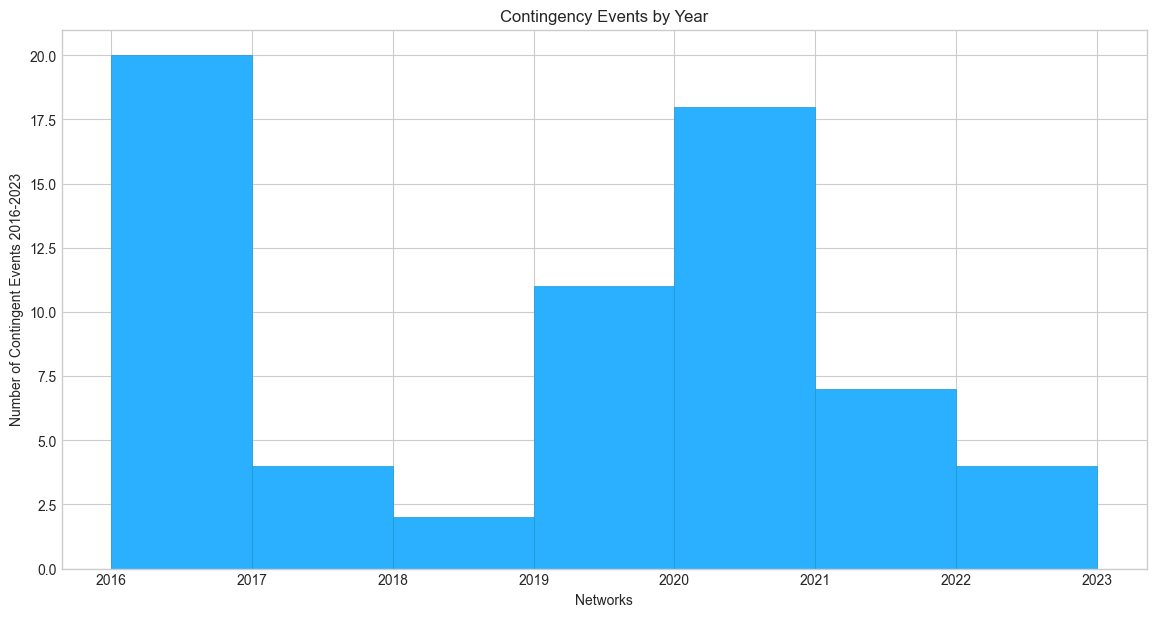

In [39]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(clog_df['Event Date'].dt.year, bins=7, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Contingency Events by Year') 
plt.xlabel('Networks') 
#plt.xticks(rotation='vertical')
plt.ylabel('Number of Contingent Events 2016-2023') 
plt.show()

In [40]:
#get the individual network contingency events
#iclog_df = clog_df[~clog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***','Brownsville*'])]
#iclog_df

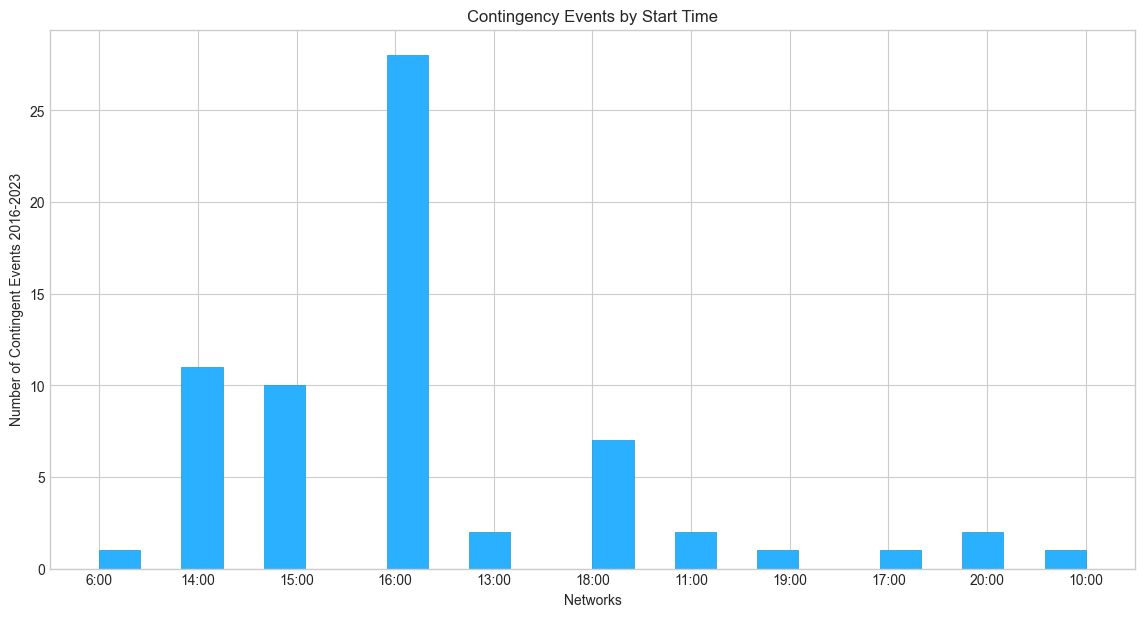

In [41]:
#convert start times to datetime format
clog_df['DT Format'] = pd.to_datetime(clog_df['Start Time'], format='%H:%M')
clog_df['Start Time Float'] = clog_df['DT Format'].dt.hour + (clog_df['DT Format'].dt.minute/60)
#convert to float
clog_df['Start Time Float'].apply(lambda x: float(x))

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(clog_df['Start Time'], bins=24, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Contingency Events by Start Time') 
plt.xlabel('Networks') 
#plt.xticks(rotation='vertical')
plt.ylabel('Number of Contingent Events 2016-2023') 
plt.show()

In [42]:
clog_df[clog_df['Start Time']=='6:00']

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type,Month,DT Format,Start Time Float
176,2016-07-24,Con Edison,DLRP,6:00,10:00,4:00,Riverdale,Event,Contingency,7,1900-01-01 06:00:00,6.0


## CSRP Analysis

In [6]:
#filter out non CSRP events
rlog_df = flog_df[flog_df['Program'].isin(['CSRP'])]

print(rlog_df.shape)
rlog_df.head()

(123, 9)


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
178,2016-07-25,Con Edison,CSRP,11:00,15:00,4:00,All,Event,Planned
179,2016-07-25,Con Edison,CSRP,14:00,18:00,4:00,All,Event,Planned
180,2016-07-25,Con Edison,CSRP,16:00,20:00,4:00,All,Event,Planned
181,2016-07-25,Con Edison,CSRP,19:00,23:00,4:00,All,Event,Planned
187,2016-07-26,Con Edison,CSRP,11:00,15:00,4:00,All,Event,Planned


In [10]:
# this shows that more than 4 CSRP events per year for a given network is rare
# 2020 is an outlier in that it had many CSRP events that weren't for the entire network

# merge by day because CSRP events typically happen for all networks but redudant events are logged by call time
rD_s = rlog_df.groupby(rlog_df['Event Date'].dt.date).size()#.rename(columns={'size':'sum'})
#make a new data frame of event days
rY_s = pd.DataFrame({'dates':pd.to_datetime(rD_s.keys())})
#regroup by year
rY_s.groupby(rY_s['dates'].dt.year).size()

dates
2016     4
2018     4
2019     4
2020    19
2021     4
2022     6
2023     2
dtype: int64

In [14]:
rD_s

Event Date
2016-07-25    4
2016-07-26    4
2016-08-12    3
2016-08-15    4
2018-07-02    4
2018-08-28    4
2018-08-29    4
2018-09-06    4
2019-07-19    4
2019-07-20    4
2019-07-21    4
2019-08-19    4
2020-07-20    1
2020-07-27    1
2020-07-28    1
2021-06-29    4
2021-06-30    4
2021-08-12    4
2021-08-13    4
2022-07-20    4
2022-07-21    4
2022-08-04    4
2022-08-05    4
2022-08-08    4
2022-08-09    4
2023-07-28    7
2023-09-07    8
dtype: int64

In [11]:
# this shows that more than 4 CSRP events per year for a given network is rare
# 2020 is an outlier in that it had many CSRP events that weren't for the entire network

# merge by day because CSRP events typically happen for all networks but redudant events are logged by call time
rD_s = rlog_df[rlog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***'])].groupby(rlog_df['Event Date'].dt.date).size()#.rename(columns={'size':'sum'})
#make a new data frame of event days
rY_s = pd.DataFrame({'dates':pd.to_datetime(rD_s.keys())})

#regroup by year
yS = rY_s.groupby(rY_s['dates'].dt.year).size()

#add 0 'all' events in to 2020
#yS.at['2020']=0

yS

dates
2016    4
2018    4
2019    4
2020    3
2021    4
2022    6
2023    2
dtype: int64

In [12]:
#average 'all' events
yS.mean()

np.float64(3.857142857142857)

In [13]:
yS

dates
2016    4
2018    4
2019    4
2020    3
2021    4
2022    6
2023    2
dtype: int64

## DLRP Test Event Analysis

In [47]:
#filter out NYISO
tlog_df = log_df[log_df['Administrator']=='Con Edison']

#filter out non DLRP events
tlog_df = tlog_df[tlog_df['Program'].isin(['DLRP'])]

#filter out non-Test events
tlog_df = tlog_df[tlog_df['Event/Test'] == 'Test']

pd.set_option('display.max_rows', None)  # or 1000
display(tlog_df)

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
1,2011-06-08,Con Edison,DLRP,15:00,16:00,1:00,All,Test,NaN
69,2013-06-26,Con Edison,DLRP,12:00,13:00,1:00,All,Test,NaN
118,2014-06-26,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
148,2015-06-24,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
168,2016-07-13,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
273,2017-07-18,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
276,2017-07-31,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
330,2018-07-16,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test
502,2019-08-20,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
593,2020-08-24,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test


In [48]:
#filter out pre-2016 data
tlog_df[tlog_df['Event Date'] > datetime.strptime('2016-01-01', '%Y-%m-%d')]

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
168,2016-07-13,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
273,2017-07-18,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
276,2017-07-31,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
330,2018-07-16,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test
502,2019-08-20,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
593,2020-08-24,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test
646,2021-07-27,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
685,2022-07-18,Con Edison,DLRP,16:30,18:30,2:00,All,Test,Test
800,2022-07-14,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
